In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pylab as pl
from IPython import display
import time

In [2]:
x = np.linspace(0, 10, 100)
y = 2*x + 1 +  np.random.normal(size=(100,))

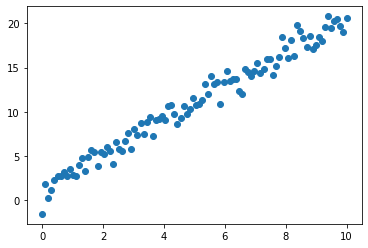

In [3]:
plt.scatter(x, y)

In [4]:
cov = np.cov(x,y)

In [5]:
cov

array([[ 8.58755909, 16.58527226],
       [16.58527226, 32.92912439]])

In [6]:
w_1 = cov[0,1] / cov[0,0]
w_0 = np.mean(y) - w_1*np.mean(x)

In [7]:
print('intercept:', w_0)
print('slope:', w_1)

intercept: 1.3308003894387728
slope: 1.9313139019639656


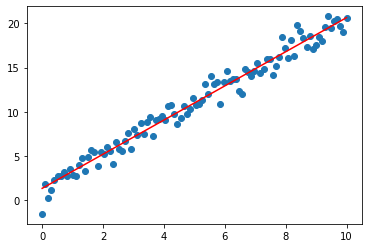

In [8]:
plt.scatter(x, y)
plt.plot(x, x*w_1 + w_0, 'r')

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [11]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.3308003894387799
slope: [1.9313139]


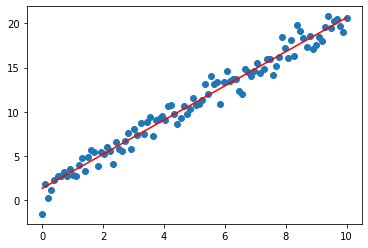

In [12]:
plt.scatter(x, y)
plt.plot(x, x*model.coef_ + model.intercept_, 'r')

# Descenso por Gradiente
___

KeyboardInterrupt: 

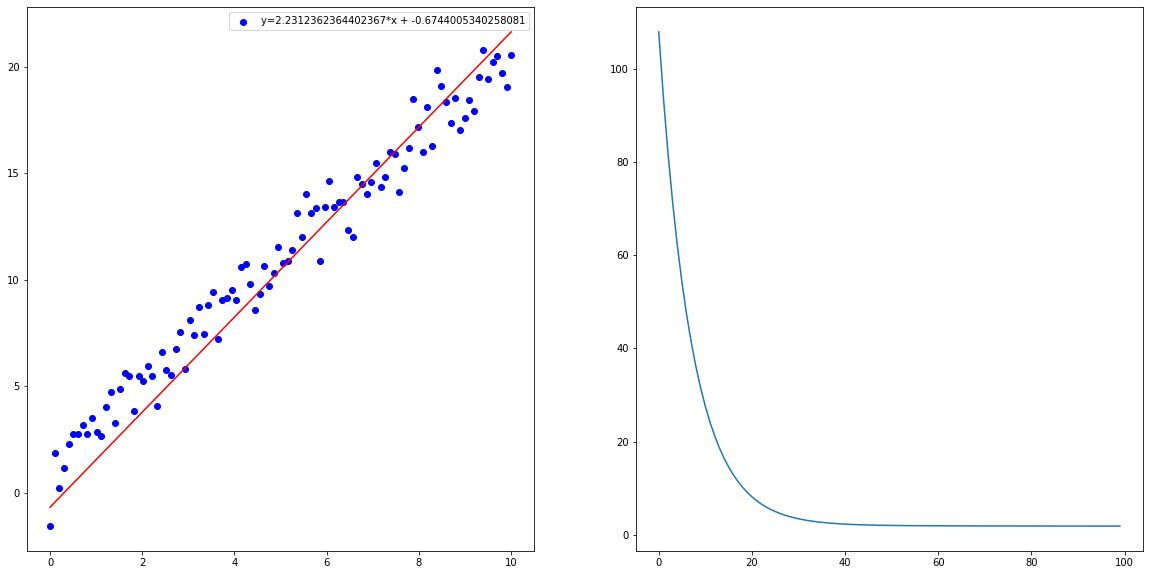

In [13]:
# Building the model
w_0 = np.random.normal()
w_1 = np.random.normal()

alpha = 0.001  # The learning Rate
epochs = 100 # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

loss = []

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = w_1*x + w_0  # The current predicted value of Y
    D_w_1 = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt m
    D_w_0 = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    w_1 = w_1 - alpha * D_w_1  # Update m
    w_0 = w_0 - alpha * D_w_0  # Update c
    
    y_pred = w_1*x + w_0
    loss.append((1/n)*np.sum((y-y_pred)**2))
    
    # To plot
    ax1.clear()
    ax2.clear()
    ax1.scatter(x, y, color='blue', label=f'y={w_1}*x + {w_0}') 
    ax1.plot(x, y_pred, color='red')  # regression line
    ax1.legend()
    ax2.plot(loss)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())